# An example of tweaking the LrLx plot

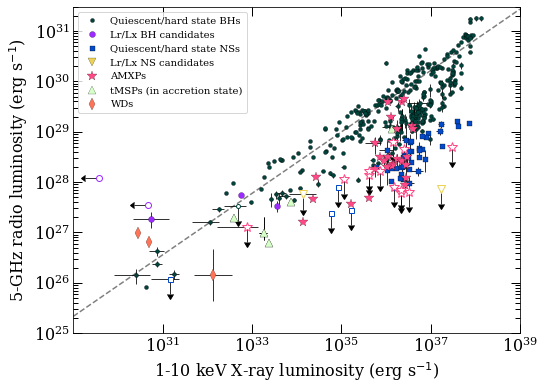

In [1]:
import numpy as np
import lrlx_plot as lrlx
import matplotlib.pyplot as plt

### Reading in the data and modifying it

In [2]:
DATA = lrlx.data_reader()
DATA.head()

,Name,Class,Lr,Lr_ler,Lr_uer,Lx,Lx_ler,Lx_uer,uplim,Ref
0,A0620-00,BH,2.415711e+26,3.279963e+25,3.279963e+25,7.476976e+30,1.698887e+30,2.378977e+30,None,"Gallo et al. 2006, MNRAS, 370, 1351; Dincer et..."
1,A0620-00,BH,1.492718e+26,3.213025e+25,3.213025e+25,1.799294e+31,3.835548e+30,5.014996e+30,None,"Gallo et al. 2006, MNRAS, 370, 1351; Dincer et..."
2,XTE J1118+480,BH,1.011442e+29,0.000000e+00,0.000000e+00,2.062842e+35,0.000000e+00,0.000000e+00,None,"Fender et al. 2010, MNRAS, 406, 1425; Gallo et..."
3,XTE J1118+480,BH,9.855076e+28,0.000000e+00,0.000000e+00,2.097762e+35,0.000000e+00,0.000000e+00,None,"Fender et al. 2010, MNRAS, 406, 1425; Gallo et..."
4,XTE J1118+480,BH,7.676585e+28,0.000000e+00,0.000000e+00,1.761429e+35,0.000000e+00,0.000000e+00,None,"Fender et al. 2010, MNRAS, 406, 1425; Gallo et..."


Imagine you don't want the data on a specific source to be included, you can do this via various pandas tricks, for example:

In [3]:
MYDATA = DATA[DATA['Name'] != 'MWC 656']

With similar tricks you can add new rows, modify values for existing rows, etc, etc. For now we continue with the editted dataset made above.

### Making the figure with the updated data and adding new modifications

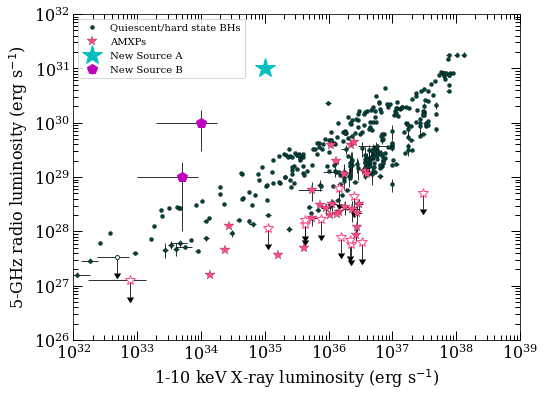

In [4]:
FIG = plt.figure(figsize=(8,6))
FIG = lrlx.plotter(MYDATA, ['BH', 'AMXP'], FIG, cor_lines=False)
AX = FIG.axes[0]

# You can simply add a point
newsrcA, = AX.plot(1e35,1e31,'c*',ms=20,label='New Source A')

# Or add arrays, uncertainties, etc
newsrcB = AX.errorbar([5e33,1e34], [1e29,1e30],
                      yerr=[9e28,7e29], xerr=[4e33,8e33],
                      fmt='mp', ms=10, ecolor='k', elinewidth=0.8,
                      label='New Source B')

# Even if you want to add a line
#line_x = np.logspace(32,39)
#line_y = 1e-6*line_x
#newline, = AX.plot(line_x,line_y,'--k')

# Or change plotting properties
AX.set_xlim(1e32,1e39)
AX.set_ylim(1e26,1e32)

# You do need to update the legend
AX.legend()

FIG;

# And you can save with:
#FIG.savefig('my_new_lrlx_plot.jpg',dpi=300, bbox_inches='tight')